In [1]:
import numpy as np
import matplotlib.pyplot as ply
import random
from matplotlib import cm
from matplotlib.ticker import LinearLocator
##Import some packages

In [2]:
%pip install scipy
import scipy
from scipy.linalg import logm, expm

In [3]:
X = np.matrix('0 1; 1 0')##definition of the Pauli matrices
Z = np.matrix('1 0; 0 -1')
Y = np.matrix('0 -1j; 1j 0') 
I = np.matrix('1 0; 0 1')
ket_plus = 1/np.sqrt(2)*np.matrix('1;1') ##ket(+)
ket_minus = 1/np.sqrt(2)*np.matrix('1;-1') ##Ket(-)
ket0 = np.matrix('1;0') ##Ket(0)
ket1 = np.matrix('0;1') ##Ket(1)

In [4]:
def log2(a):##the definition for log2 of matrix
    return logm(a)/np.log(2.0)

In [5]:
def BB84(P,rho):##P is the probability between 0 and 1,rho is the input density operator of 1 qubit case (2*2 matrix)
    return (1-P)**2*rho+P*(1-P)*X*rho*X+P*(1-P)*Z*rho*Z+P**2*Y*rho*Y

In [6]:
def BB841(P,rho):##P is the probability between 0 and 1,rho is the input density operator corresponding to bipartite state of 2-qubit case (4*4 matrix)
    return (1-P)**2*np.kron(I,I)*rho*np.kron(I,I)+P*(1-P)*np.kron(I,X)*rho*np.kron(I,X)+P*(1-P)*np.kron(I,Z)*rho*np.kron(I,Z)+P**2*np.kron(I,Y)*rho*np.kron(I,Y)

In [7]:
def entropy(C,P,rho):##C is the channel, P is the probability and rho is the input density operator, both same as in function BB84, used to calculate the entropy 
    return -np.trace(np.matmul(C(P,rho),log2(C(P,rho))))

In [8]:
def entropy1(C,F,P,rho):##C is the channel, F is the vacuum Interference Operator,P is the probability and rho is the input density operator, both same as in function BB84, used to calculate the entropy after superposition of channels C
    rho_plus=np.matmul(ket_plus,ket_plus.conj().T)
    rho_minus=np.matmul(ket_minus,ket_minus.conj().T)
    rho1=np.kron(0.5*(C(P,rho)+np.matmul(F,np.matmul(rho,F.conj().T))),rho_plus)+np.kron(0.5*(C(P,rho)-np.matmul(F,np.matmul(rho,F.conj().T))),rho_minus)##Resulting density operator after implementing superposition of BB84 channels
    return -np.trace(np.matmul(rho1,log2(rho1)))

In [9]:
def entropy2(rho):##rho is the input density operator same as in function BB84, used to calculate the entropy without channel
    return -np.trace(np.matmul(rho,log2(rho)))

In [139]:
def f(theta): ## coherent information for one BB84 channel, the input is a list of length 6
    r1=theta[0]
    r2=theta[1]%(np.sqrt(1-r1**2))
    r3=theta[2]%(np.sqrt(1-r1**2-r2**2))
    phi=r1*np.kron(ket0,ket0)+r2*np.exp(1j*theta[3])*np.kron(ket0,ket1)+r3*np.exp(1j*theta[4])*np.kron(ket1,ket0)+np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*theta[5])*np.kron(ket1,ket1)##Define a random state of 1 qubit
    rho1=np.matmul(phi,phi.conj().T) ##rho_AB
    rho2=r1**2*np.matmul(ket0,ket0.conj().T)+r1*r2*np.exp(1j*(-theta[3]))*np.matmul(ket0,ket1.conj().T)+r2**2*np.matmul(ket1,ket1.conj().T)+r1*r2*np.exp(1j*theta[3])*np.matmul(ket1,ket0.conj().T)+r3**2*np.matmul(ket0,ket0.conj().T)+r3*np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*(theta[4]-theta[5]))*np.matmul(ket0,ket1.conj().T)+(1-r1**2-r2**2-r3**2)*np.matmul(ket1,ket1.conj().T)+r3*np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*(theta[5]-theta[4]))*np.matmul(ket1,ket0.conj().T)##rho_B
    return entropy(BB841,0.9,rho1)-entropy(BB84,0.9,rho2)##the minus of coherent information as the optimization returns minimum value

In [37]:
from scipy.optimize import dual_annealing, minimize, differential_evolution##Global optimization function
bnds = [(0,1),(0,1),(0,1),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2)]##optimized parameters. 1, 2, 3 are parameters for coefficients in front of ket_AB and 4, 5, 6 are parameters in exponential
results = dual_annealing(f,bnds,maxiter=5)##f is the function we want to optimize, bnds contains the range of inputs for f, Maxiter is the times of optimization, noticed 5 times can be fine
results##returns the minimum value of function f and the corresponded values of input for f

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.06200881281749471+2.2074913512197973e-16j)
       x: [ 6.947e-01  1.319e-01  8.390e-01  3.120e+00  1.069e+00
            1.047e+00]
     nit: 5
    nfev: 152
    njev: 13
    nhev: 0

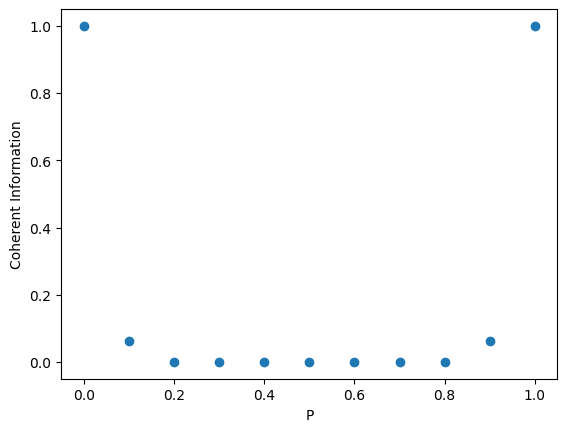

In [88]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.9999999999940516,0.06200881280187809,2.7909563549144423e-11,2.220446049250313e-16,3.613402699276236e-07,1.2716734332229862e-09,2.220446049250313e-16,1.1102230246251565e-15,-5.551115123125783e-16,0.06200881282142001,0.9999999999969549]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Coherent Information")
ply.show()

In [55]:
def f1(theta):  ##Coherent Inforamtion for Superposition of two BB84 channels
    r1=theta[0]
    r2=theta[1]%(np.sqrt(1-r1**2))
    r3=theta[2]%(np.sqrt(1-r1**2-r2**2))
    phi=r1*np.kron(ket0,ket0)+r2*np.exp(1j*theta[3])*np.kron(ket0,ket1)+r3*np.exp(1j*theta[4])*np.kron(ket1,ket0)+np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*theta[5])*np.kron(ket1,ket1)##Define a random state of 1 qubit
    rho1=np.matmul(phi,phi.conj().T)##rho_AB
    rho2=r1**2*np.matmul(ket0,ket0.conj().T)+r1*r2*np.exp(1j*(-theta[3]))*np.matmul(ket0,ket1.conj().T)+r2**2*np.matmul(ket1,ket1.conj().T)+r1*r2*np.exp(1j*theta[3])*np.matmul(ket1,ket0.conj().T)+r3**2*np.matmul(ket0,ket0.conj().T)+r3*np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*(theta[4]-theta[5]))*np.matmul(ket0,ket1.conj().T)+(1-r1**2-r2**2-r3**2)*np.matmul(ket1,ket1.conj().T)+r3*np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*(theta[5]-theta[4]))*np.matmul(ket1,ket0.conj().T)##rho_B
    F=(1-0.9)**2*np.exp(-1j*theta[6])*I+0.9*(1-0.9)*np.exp(-1j*theta[7])*X+0.9*(1-0.9)*np.exp(-1j*theta[8])*Z+0.9**2*np.exp(-1j*theta[9])*Y##Vacuum Interference Operator
    return entropy1(BB841,np.kron(I,F),0.9,rho1)-entropy1(BB84,F,0.9,rho2)

In [56]:
from scipy.optimize import dual_annealing, minimize, differential_evolution##Global optimization function
bnds = [(0,1),(0,1),(0,1),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2)]##Compared with single channel case, it has extra 4 parameters comes from Vacuum Interference Operator
results = dual_annealing(f1,bnds,maxiter=5)##f1 is the function we want to optimize, bnds contains the range of inputs for f1, Maxiter is the times of optimization, noticed 5 times can be fine
results##returns the minimum value of function f1 and the corresponded values of input for f1

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.2625029932044318-8.21109542329209e-18j)
       x: [ 7.071e-01  1.425e-04  7.072e-01  2.722e+00  5.182e-01
            2.115e-01  1.571e+00  0.000e+00  0.000e+00  6.283e+00]
     nit: 5
    nfev: 1795
    njev: 154
    nhev: 0

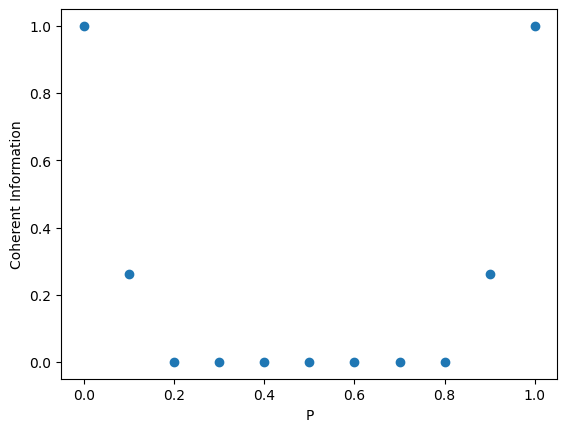

In [89]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.999999999999952,0.2625029926621154,1.2382317393644371e-11,2.826960977908577e-05,0,0,-5.44212674924438e-10,-4.178990486991552e-11,-1.021467355144523e-10,0.2625029926979081,0.9998739845388571]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Coherent Information")
ply.show()

In [10]:
def Eve(theta1,theta2,P,rho_A):##theta1 and theta2 are variables for Evesdropper state, just like Bloch sphere, P is the probability of BB84 channel and rho_A is the density operator (2*2 matrix) for Alice, the function returns the resulting density operator of Evesdropper after implementing BB84 channel and density operator for Eve before BB84 channel
    E=np.cos(theta1)*ket0+np.sin(theta1)*np.exp(1j*theta2)*ket1##Eve's state
    rho_E=np.matmul(E,E.conj().T)##density operator of Eve
    u_00=(1-P)*I           
    u_01=np.sqrt((1-P)*P)*X
    u_10=np.sqrt((1-P)*P)*Z
    u_11=P*Y##BB84 kraus operators
    u=np.kron(u_00,np.matmul(ket0,ket0.conj().T))+np.kron(u_01,np.matmul(ket0,ket1.conj().T))+np.kron(u_10,np.matmul(ket1,ket0.conj().T))+np.kron(u_11,np.matmul(ket1,ket1.conj().T))##Maps A * E -> B * E, * is the tensor product
    f1=np.trace(np.matmul(u_00,np.matmul(rho_A,u_00.conj().T))*np.cos(theta1)**2+np.cos(theta1)*np.sin(theta1)*np.exp(-1j*theta2)*np.matmul(u_00,np.matmul(rho_A,u_01.conj().T))+np.cos(theta1)*np.sin(theta1)*np.exp(1j*theta2)*np.matmul(u_01,np.matmul(rho_A,u_00.conj().T))+np.matmul(u_01,np.matmul(rho_A,u_01.conj().T))*np.sin(theta1)**2)
    f2=np.trace(np.matmul(u_00,np.matmul(rho_A,u_10.conj().T))*np.cos(theta1)**2+np.cos(theta1)*np.sin(theta1)*np.exp(-1j*theta2)*np.matmul(u_00,np.matmul(rho_A,u_11.conj().T))+np.cos(theta1)*np.sin(theta1)*np.exp(1j*theta2)*np.matmul(u_01,np.matmul(rho_A,u_10.conj().T))+np.matmul(u_01,np.matmul(rho_A,u_11.conj().T))*np.sin(theta1)**2)
    f3=np.trace(np.matmul(u_10,np.matmul(rho_A,u_00.conj().T))*np.cos(theta1)**2+np.cos(theta1)*np.sin(theta1)*np.exp(-1j*theta2)*np.matmul(u_10,np.matmul(rho_A,u_01.conj().T))+np.cos(theta1)*np.sin(theta1)*np.exp(1j*theta2)*np.matmul(u_11,np.matmul(rho_A,u_00.conj().T))+np.matmul(u_11,np.matmul(rho_A,u_01.conj().T))*np.sin(theta1)**2)
    f4=np.trace(np.matmul(u_10,np.matmul(rho_A,u_10.conj().T))*np.cos(theta1)**2+np.cos(theta1)*np.sin(theta1)*np.exp(-1j*theta2)*np.matmul(u_10,np.matmul(rho_A,u_11.conj().T))+np.cos(theta1)*np.sin(theta1)*np.exp(1j*theta2)*np.matmul(u_11,np.matmul(rho_A,u_10.conj().T))+np.matmul(u_11,np.matmul(rho_A,u_11.conj().T))*np.sin(theta1)**2)
    f5=[[f1,f2], [f3,f4]]##f1,f2,f3 and f4 are obtained after partial tracing of Bob
    return [f5,rho_E]

In [87]:
def Eve1(theta): ## Orthogonal One BB84 channel
    y_0=np.cos(theta[0])*ket0+np.exp(1j*theta[1])*np.sin(theta[0])*ket1##Based on Bloch sphere
    y_1=np.sin(theta[0])*ket0-np.exp(1j*theta[1])*np.cos(theta[0])*ket1
    rho_y_0=np.matmul(y_0,y_0.conj().T)
    rho_y_1=np.matmul(y_1,y_1.conj().T)
    rho_XB=theta[2]*np.kron(np.matmul(ket0,ket0.conj().T),BB84(0.1,rho_y_0))+(1-theta[2])*np.kron(np.matmul(ket1,ket1.conj().T),BB84(0.1,rho_y_1))##Classical-quantum density operator after implementing BB84 channel
    rho_B=theta[2]*BB84(0.1,rho_y_0)+(1-theta[2])*BB84(0.1,rho_y_1)##Bob's density Operator
    rho_X=theta[2]*np.matmul(ket0,ket0.conj().T)+(1-theta[2])*np.matmul(ket1,ket1.conj().T)##Classical density operator
    rho_A=theta[2]*rho_y_0+(1-theta[2])*rho_y_1##Alice's density Operator
    return -(entropy2(rho_B)+entropy2(rho_X)-entropy2(rho_XB)-(entropy2(Eve(theta[3],theta[4],0.1,rho_A)[0])+entropy2(rho_X)-entropy2(np.kron(rho_X,Eve(theta[3],theta[4],0.1,rho_A)[0]))))

In [88]:
from scipy.optimize import dual_annealing, minimize, differential_evolution##Global optimization function
bnds = [(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi/2),(0,np.pi*2)]##1,2 are parameters defined for Alice's state, third parameter used for probabilities in classical-quantum state, 4 and 5th parameters used for defining Eve's tate
results = dual_annealing(Eve1,bnds,maxiter=5)##Eve1 is the function we want to optimize, bnds contains the range of inputs for Eve1,Maxiter is the times of optimization,noticed 5 times can be fine
results##returns the minimum value of function Eve1,and the corresponded values of input for Eve1

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.43100440641038085-0j)
       x: [ 0.000e+00  3.219e-01  5.000e-01  0.000e+00  2.869e+00]
     nit: 5
    nfev: 111
    njev: 10
    nhev: 0

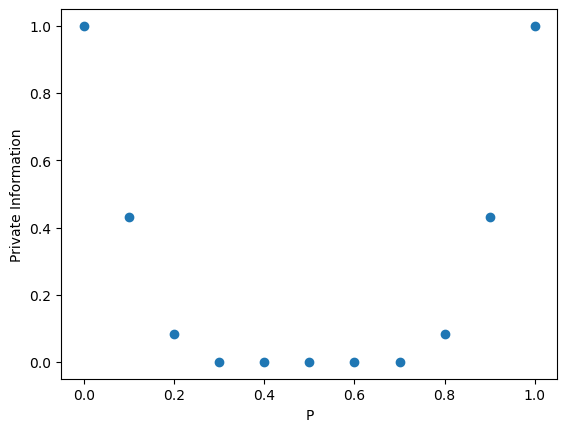

In [52]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.9999999999999981,0.43100440641009774,0.08457237184966537,0,0,0,0,0,0.08457237174515475,0.43100440640460147,0.9999999999969549]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information")
ply.show()

In [11]:
def entropy3(rho1,F,rho2):##F is the vacuum Interference Operator, rho2 is the input density operator and rho1 is the outpust density operatopr after channel, both same as in function BB84, used to calculate the entropy after superposition of channels C
    rho_plus=np.matmul(ket_plus,ket_plus.conj().T) 
    rho_minus=np.matmul(ket_minus,ket_minus.conj().T)
    rho=np.kron(0.5*(rho1+np.matmul(F,np.matmul(rho2,F.conj().T))),rho_plus)+np.kron(0.5*(rho1-np.matmul(F,np.matmul(rho2,F.conj().T))),rho_minus)##Resulting density operator after implementing superposition of BB84 channels
    return -np.trace(np.matmul(rho,log2(rho)))

In [95]:
def SupE1(theta):## Othogonal superposition case
    y_0=np.cos(theta[0])*ket0+np.exp(1j*theta[1])*np.sin(theta[0])*ket1
    y_1=np.sin(theta[0])*ket0-np.exp(1j*theta[1])*np.cos(theta[0])*ket1
    rho_y_0=np.matmul(y_0,y_0.conj().T)
    rho_y_1=np.matmul(y_1,y_1.conj().T)
    rho_XA=theta[2]*np.kron(np.matmul(ket0,ket0.conj().T),rho_y_0)+(1-theta[2])*np.kron(np.matmul(ket1,ket1.conj().T),rho_y_1)
    rho_XB=theta[2]*np.kron(np.matmul(ket0,ket0.conj().T),BB84(0.1,rho_y_0))+(1-theta[2])*np.kron(np.matmul(ket1,ket1.conj().T),BB84(0.1,rho_y_1))
    rho_B=theta[2]*BB84(0.1,rho_y_0)+(1-theta[2])*BB84(0.1,rho_y_1)
    rho_A=theta[2]*rho_y_0+(1-theta[2])*rho_y_1
    rho_X=theta[2]*np.matmul(ket0,ket0.conj().T)+(1-theta[2])*np.matmul(ket1,ket1.conj().T)
    F=(1-0.1)**2*np.exp(-1j*theta[3])*I+0.1*(1-0.1)*np.exp(-1j*theta[4])*X+0.1*(1-0.1)*np.exp(-1j*theta[5])*Z+0.1**2*np.exp(-1j*theta[6])*Y##Vacuum Interference Operator
    return -(entropy2(rho_X)+entropy3(rho_B,F,rho_A)-entropy3(rho_XB,np.kron(I,F),rho_XA)-(entropy3(Eve(theta[7],theta[8],0.1,rho_A)[0],F,Eve(theta[7],theta[8],0.1,rho_A)[1])+entropy2(rho_X)-entropy3(np.kron(rho_X,Eve(theta[7],theta[8],0.1,rho_A)[0]),np.kron(I,F),np.kron(rho_X,Eve(theta[7],theta[8],0.1,rho_A)[1]))))

In [96]:
from scipy.optimize import dual_annealing, minimize, differential_evolution##Global optimization function
bnds = [(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi/2),(0,np.pi*2)]##1,2 are parameters defined for Alice's state, third parameter used for probabilities in classical-quantum state,4,5,6 and 7th parmaters used forVacuum Interference Operator, the last two parameters used for defining Eve's state 
results = dual_annealing(SupE1,bnds,maxiter=5)##SupE1 is the function we want to optimize, bnds contains the range of inputs for Eve1, Maxiter is the times of optimization,noticed 5 times can be fine
results##returns the minimum value of function SupE1,and the corresponded values of input for SupE1

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.5452080086652904-6.398221448502421e-17j)
       x: [ 1.167e+00  3.439e+00  5.075e-01  2.129e+00  2.717e-01
            3.986e+00  5.270e+00  8.146e-04  4.590e+00]
     nit: 5
    nfev: 401
    njev: 31
    nhev: 0

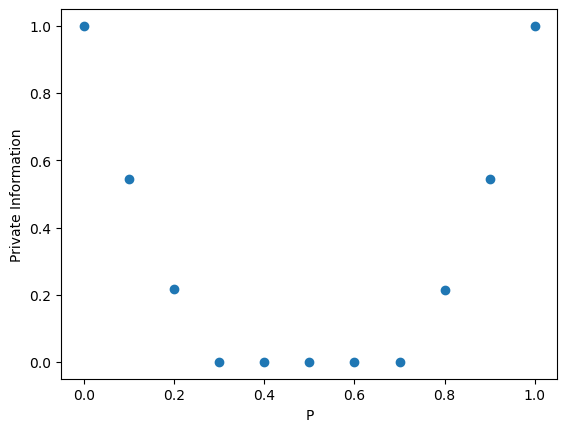

In [109]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.9999999999996929,0.5452074781344851,0.21647286011113365,0,0,0,0,0,0.2141774263007723,0.5452074792756527,0.9999999999998554]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information")
ply.show()

In [26]:
def Eve2(theta): ##Not Orthogonal one BB84 case, same as function Eve1, just different definitions of Alice's tsate and introduces extra 2 parameters
    y_0=np.cos(theta[0])*ket0+np.exp(1j*theta[1])*np.sin(theta[0])*ket1
    y_1=theta[5]*ket0+np.sqrt(1-theta[5]**2)*np.exp(1j*theta[6])*ket1
    rho_y_0=np.matmul(y_0,y_0.conj().T)
    rho_y_1=np.matmul(y_1,y_1.conj().T)
    rho_XB=theta[2]*np.kron(np.matmul(ket0,ket0.conj().T),BB84(0.1,rho_y_0))+(1-theta[2])*np.kron(np.matmul(ket1,ket1.conj().T),BB84(0.1,rho_y_1))
    rho_B=theta[2]*BB84(0.1,rho_y_0)+(1-theta[2])*BB84(0.1,rho_y_1)
    rho_X=theta[2]*np.matmul(ket0,ket0.conj().T)+(1-theta[2])*np.matmul(ket1,ket1.conj().T)
    rho_A=theta[2]*rho_y_0+(1-theta[2])*rho_y_1
    return -(entropy2(rho_B)+entropy2(rho_X)-entropy2(rho_XB)-(entropy2(Eve(theta[3],theta[4],0.1,rho_A)[0])+entropy2(rho_X)-entropy2(np.kron(rho_X,Eve(theta[3],theta[4],0.1,rho_A)[0]))))

In [27]:
from scipy.optimize import dual_annealing, minimize, differential_evolution
bnds = [(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi*2)]
results = dual_annealing(Eve2,bnds,maxiter=5)
results

/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:598: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
/lib/python3.11/site-packages/scipy/optimize/_lbfgsb_py.py:356: ComplexWarning: Casting complex values to real discards the imaginary part
  _lbfgsb.setulb(m, x, low_bnd, upper_bnd, nbd, f, g, factr,


 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.4310044063461491-1.2513383381600421e-16j)
       x: [ 6.588e-01  6.283e+00  5.000e-01  4.904e-06  6.380e-01
            6.122e-01  3.142e+00]
     nit: 5
    nfev: 175
    njev: 13
    nhev: 0

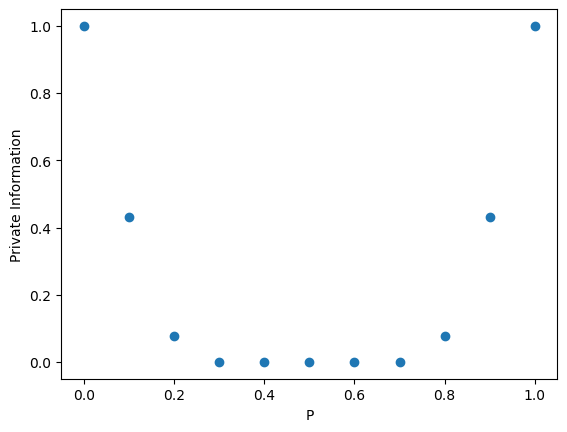

In [151]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.9999999999980588,0.4310044064076264,0.07807190510919781,0,0,0,0,0,0.07807190511263595,0.4310044063984302,0.9999999999923324]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information")
ply.show()

In [142]:
def SupE2(theta): ##Not Orthogonal Superposition case, same as function SupE1, just different definitions of Alice's tsate and introduces extra 2 parameters
    y_0=np.cos(theta[0])*ket0+np.exp(1j*theta[1])*np.sin(theta[0])*ket1
    y_1=np.cos(theta[9])*ket0+np.exp(1j*theta[10])*np.sin(theta[9])*ket1
    rho_y_0=np.matmul(y_0,y_0.conj().T)
    rho_y_1=np.matmul(y_1,y_1.conj().T)
    rho_XA=theta[2]*np.kron(np.matmul(ket0,ket0.conj().T),rho_y_0)+(1-theta[2])*np.kron(np.matmul(ket1,ket1.conj().T),rho_y_1)
    rho_XB=theta[2]*np.kron(np.matmul(ket0,ket0.conj().T),BB84(0.9,rho_y_0))+(1-theta[2])*np.kron(np.matmul(ket1,ket1.conj().T),BB84(0.9,rho_y_1))
    rho_B=theta[2]*BB84(0.9,rho_y_0)+(1-theta[2])*BB84(0.9,rho_y_1)
    rho_A=theta[2]*rho_y_0+(1-theta[2])*rho_y_1
    rho_X=theta[2]*np.matmul(ket0,ket0.conj().T)+(1-theta[2])*np.matmul(ket1,ket1.conj().T)
    F=(1-0.9)**2*np.exp(-1j*theta[3])*I+0.1*(1-0.1)*np.exp(-1j*theta[4])*X+0.1*(1-0.1)*np.exp(-1j*theta[5])*Z+0.9**2*np.exp(-1j*theta[6])*Y
    return -(entropy2(rho_X)+entropy3(rho_B,F,rho_A)-entropy3(rho_XB,np.kron(I,F),rho_XA)-(entropy3(Eve(theta[7],theta[8],0.9,rho_A)[0],F,Eve(theta[7],theta[8],0.9,rho_A)[1])+entropy2(rho_X)-entropy3(np.kron(rho_X,Eve(theta[7],theta[8],0.9,rho_A)[0]),np.kron(I,F),np.kron(rho_X,Eve(theta[7],theta[8],0.9,rho_A)[1]))))

In [16]:
from scipy.optimize import dual_annealing, minimize, differential_evolution
bnds = [(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2),(0,np.pi/2),(0,np.pi*2),(0,np.pi/2),(0,np.pi*2)]
results = dual_annealing(SupE2,bnds,maxiter=5)
results

/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:598: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
/lib/python3.11/site-packages/scipy/optimize/_lbfgsb_py.py:356: ComplexWarning: Casting complex values to real discards the imaginary part
  _lbfgsb.setulb(m, x, low_bnd, upper_bnd, nbd, f, g, factr,


 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.5454119233415899+8.294799713592335e-17j)
       x: [ 4.054e-01  2.825e+00  5.075e-01  5.668e-06  3.430e+00
            5.995e+00  6.283e+00  1.571e+00  3.017e+00  1.169e+00
            6.016e+00]
     nit: 5
    nfev: 735
    njev: 52
    nhev: 0

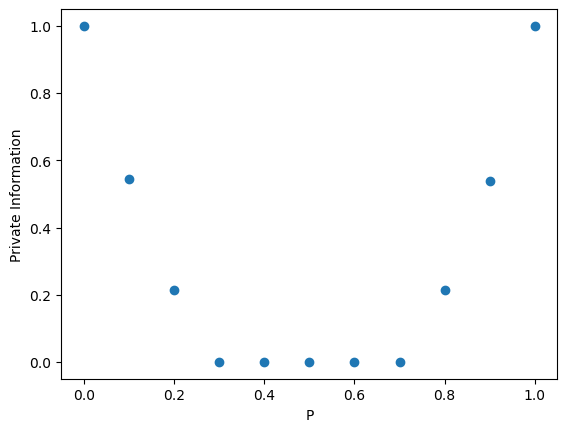

In [245]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a=[0.9999999999703237,0.545411925320527,0.21392937675791335,0,0,0,0,0,0.21393553235245433,0.5393774475749149,0.9999999999618845]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information")
ply.show()

In [71]:
def SupE3(theta): ##Not Orthogonal Superposition case for fixed phi in F,same as function SupE2, but the four parameters in Vacuum Interference Operator are chosen as special angles
    y_0=np.cos(theta[0])*ket0+np.exp(1j*theta[1])*np.sin(theta[0])*ket1
    y_1=np.cos(theta[5])*ket0+np.exp(1j*theta[6])*np.sin(theta[5])*ket1
    theta1=random.uniform(0,2*np.pi)
    theta2=random.uniform(0,2*np.pi)
    theta3=random.uniform(0,2*np.pi)
    rho_y_0=np.matmul(y_0,y_0.conj().T)
    rho_y_1=np.matmul(y_1,y_1.conj().T)
    rho_XA=theta[2]*np.kron(np.matmul(ket0,ket0.conj().T),rho_y_0)+(1-theta[2])*np.kron(np.matmul(ket1,ket1.conj().T),rho_y_1)
    rho_XB=theta[2]*np.kron(np.matmul(ket0,ket0.conj().T),BB84(0.9,rho_y_0))+(1-theta[2])*np.kron(np.matmul(ket1,ket1.conj().T),BB84(0.9,rho_y_1))
    rho_B=theta[2]*BB84(0.9,rho_y_0)+(1-theta[2])*BB84(0.9,rho_y_1)
    rho_A=theta[2]*rho_y_0+(1-theta[2])*rho_y_1
    rho_X=theta[2]*np.matmul(ket0,ket0.conj().T)+(1-theta[2])*np.matmul(ket1,ket1.conj().T)
    F=(1-0.9)**2*np.exp(-1j*0)*I+0.9*(1-0.9)*np.exp(-1j*theta1)*X+0.9*(1-0.9)*np.exp(-1j*theta2)*Z+0.9**2*np.exp(-1j*theta3)*Y##Fixed the parameters in exponential part
    result=-(entropy2(rho_X)+entropy3(rho_B,F,rho_A)-entropy3(rho_XB,np.kron(I,F),rho_XA)-(entropy3(Eve(theta[3],theta[4],0.9,rho_A)[0],F,Eve(theta[3],theta[4],0.9,rho_A)[1])+entropy2(rho_X)-entropy3(np.kron(rho_X,Eve(theta[3],theta[4],0.9,rho_A)[0]),np.kron(I,F),np.kron(rho_X,Eve(theta[3],theta[4],0.9,rho_A)[1]))))
    return [theta1,theta2,theta3,result]

In [171]:
def repeat():
    theta1=[]
    theta2=[]
    theta3=[]
    result=[]
    for i in range(150):
        g=SupE3([4.054e-01,2.825e+00,5.075e-01,1.571e+00,3.017e+00,1.169e+00,6.016e+00])
        theta1.append(g[0])
        theta2.append(g[1])
        theta3.append(g[2])
        result.append(-np.real(g[3]))
    return [theta1,theta2,theta3,result]

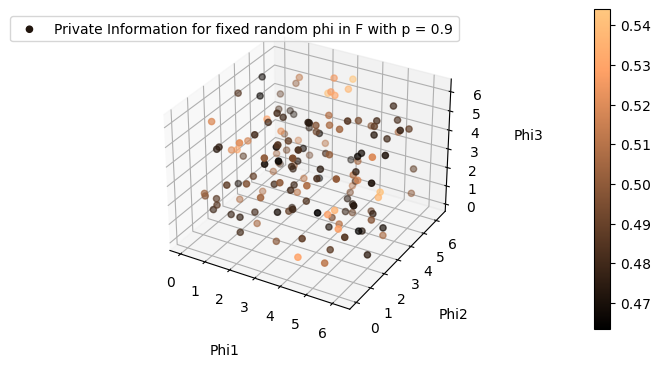

In [172]:
a=repeat()
ply.rcParams["figure.figsize"] = [7.50, 3.50]
ply.rcParams["figure.autolayout"] = True
fig = ply.figure()
ax = fig.add_subplot(projection="3d")
X = a[0]
Y = a[1]
Z = a[2]
surf = a[3]
sc = ax.scatter(X, Y, Z, c=surf, cmap="copper",label='Private Information for fixed random phi in F with p = 0.9')
ply.legend(loc="best")
ax.set_xlabel('Phi1',labelpad=15)
ax.set_ylabel('Phi2',labelpad=15)
ax.set_zlabel('Phi3',labelpad=15)
ply.colorbar(sc,pad=0.2)
ply.show()

In [50]:
from scipy.optimize import dual_annealing, minimize, differential_evolution
bnds = [(0,np.pi/2),(0,np.pi*2),(0,1),(0,np.pi/2),(0,np.pi*2),(0,np.pi/2),(0,np.pi*2)]
results = dual_annealing(SupE3,bnds,maxiter=5)
results

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.47582565239254904+1.3116421045130569j)
       x: [ 0.000e+00  5.057e+00  5.000e-01  1.566e+00  1.460e+00
            1.556e+00  0.000e+00]
     nit: 5
    nfev: 511
    njev: 55
    nhev: 0

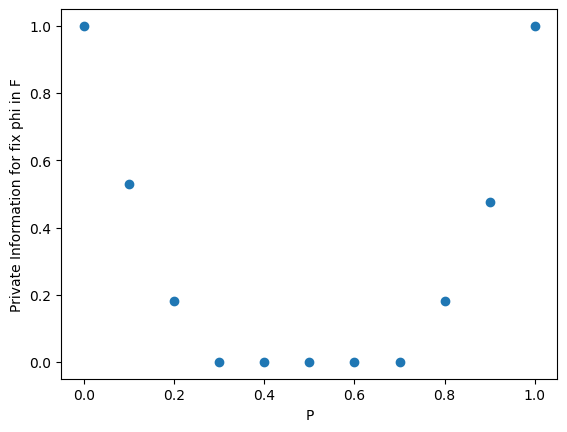

In [48]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##different phi
a=[0.9999999999769131,0.528312825908462,0.17994765915451838,0,0,0,0,0,0.18235179332536422,0.4759917523445498,0.9999999999884135]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information for fix phi in F")
ply.show()

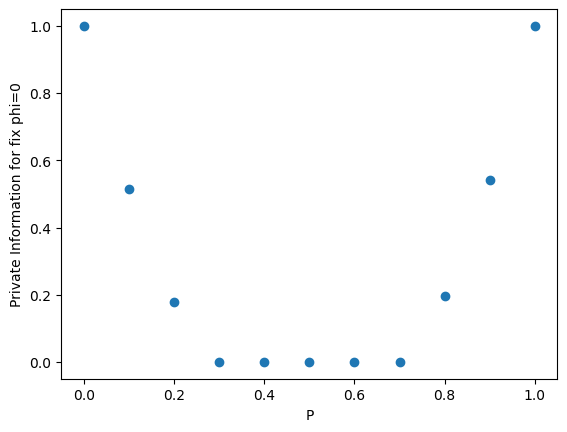

In [74]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=0
a=[0.9999999996989539,0.5148630448077807,0.17789324534995954,0,0,0,0,0,0.1962925285770214,0.5425821999882858,0.9999999999938409]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information for fix phi=0")
ply.show()

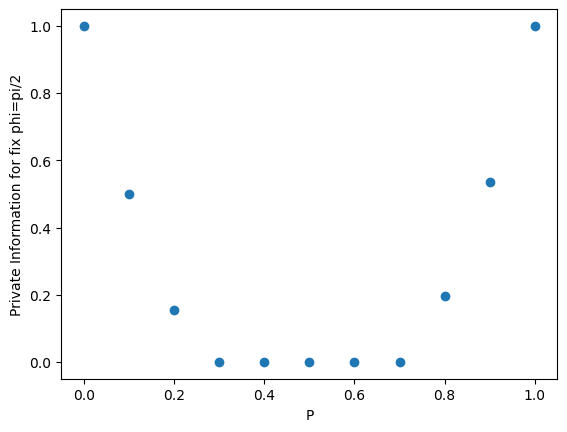

In [152]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi/2
a=[0.9999999999795521,0.4996150117648672,0.15544260898174622,0,0,0,0,0,0.19629252865934532,0.5340816734323584,0.9999999999999518]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information for fix phi=pi/2")
ply.show()

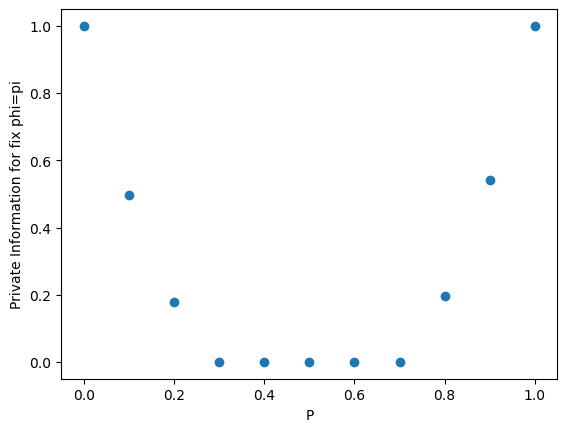

In [127]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi
a=[0.9999999998928019,0.49746424537113354,0.17789324526067007,0,0,0,0,0,0.1961134986330053,0.5425821231185262,0.9999999999861893]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information for fix phi=pi")
ply.show()

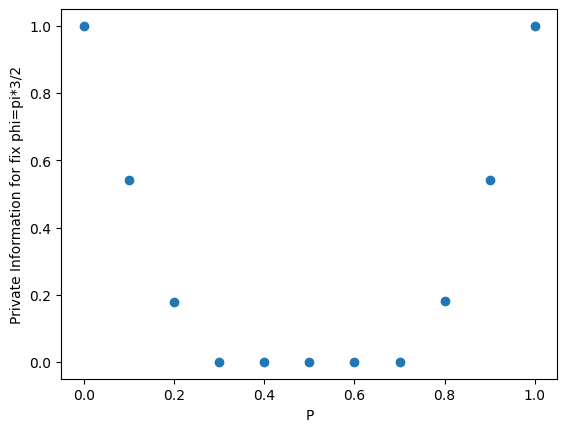

In [153]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi*3/2
a=[0.9999999996891648,0.5425824507642487,0.17789324537822404,0,0,0,0,0,0.1802369656783982,0.5425821225288245,0.9999999998394212]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Private Information for fix phi=pi*3/2")
ply.show()

In [12]:
def Sup4(theta):  ##Coherent Inforamtion for Superposition of two BB84 channels but with fixed angles in Vacuum Interference operator
    r1=theta[0]
    r2=theta[1]%(np.sqrt(1-r1**2))
    r3=theta[2]%(np.sqrt(1-r1**2-r2**2))
    theta1=random.uniform(0,2*np.pi)
    theta2=random.uniform(0,2*np.pi)
    theta3=random.uniform(0,2*np.pi)
    phi=r1*np.kron(ket0,ket0)+r2*np.exp(1j*theta[3])*np.kron(ket0,ket1)+r3*np.exp(1j*theta[4])*np.kron(ket1,ket0)+np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*theta[5])*np.kron(ket1,ket1)##Define a random state of 1 qubit
    rho1=np.matmul(phi,phi.conj().T)##rho_AB
    rho2=r1**2*np.matmul(ket0,ket0.conj().T)+r1*r2*np.exp(1j*(-theta[3]))*np.matmul(ket0,ket1.conj().T)+r2**2*np.matmul(ket1,ket1.conj().T)+r1*r2*np.exp(1j*theta[3])*np.matmul(ket1,ket0.conj().T)+r3**2*np.matmul(ket0,ket0.conj().T)+r3*np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*(theta[4]-theta[5]))*np.matmul(ket0,ket1.conj().T)+(1-r1**2-r2**2-r3**2)*np.matmul(ket1,ket1.conj().T)+r3*np.sqrt(1-r1**2-r2**2-r3**2)*np.exp(1j*(theta[5]-theta[4]))*np.matmul(ket1,ket0.conj().T)##rho_B
    F=(1-0.9)**2*np.exp(-1j*np.pi/2*3*0)*I+0.9*(1-0.9)*np.exp(-1j*theta1)*X+0.9*(1-0.9)*np.exp(-1j*theta2)*Z+0.9**2*np.exp(-1j*theta3)*Y##Vacuum Interference Operator
    result=entropy1(BB841,np.kron(I,F),0.9,rho1)-entropy1(BB84,F,0.9,rho2)
    return [theta1,theta2,theta3,result]

In [14]:
def repeat1():
    theta1=[]
    theta2=[]
    theta3=[]
    result=[]
    for i in range(150):
        g=Sup4([7.071e-01,1.425e-04,7.072e-01,2.722e+00,5.182e-01,2.115e-01])
        theta1.append(g[0])
        theta2.append(g[1])
        theta3.append(g[2])
        result.append(-np.real(g[3]))
    return [theta1,theta2,theta3,result]

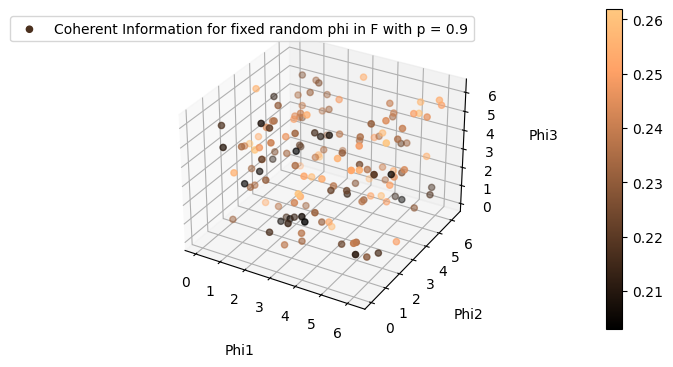

In [15]:
a=repeat1()
ply.rcParams["figure.figsize"] = [7.50, 3.50]
ply.rcParams["figure.autolayout"] = True
fig = ply.figure()
ax = fig.add_subplot(projection="3d")
X = a[0]
Y = a[1]
Z = a[2]
surf = a[3]
sc = ax.scatter(X, Y, Z, c=surf, cmap="copper",label='Coherent Information for fixed random phi in F with p = 0.9')
ply.legend(loc="best")
ax.set_xlabel('Phi1',labelpad=15)
ax.set_ylabel('Phi2',labelpad=15)
ax.set_zlabel('Phi3',labelpad=15)
ply.colorbar(sc,pad=0.2)
ply.show()

In [88]:
from scipy.optimize import dual_annealing, minimize, differential_evolution##Global optimization function
bnds = [(0,1),(0,1),(0,1),(0,np.pi*2),(0,np.pi*2),(0,np.pi*2)]##Compared with single channel case, it has extra 4 parameters comes from Vacuum Interference Operator
results = dual_annealing(Sup4,bnds,maxiter=5)##Sup4 is the function we want to optimize, bnds contains the range of inputs for Sup4, Maxiter is the times of optimization, noticed 5 times can be fine
results##returns the minimum value of function Sup4 and the corresponded values of input for Sup4

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: (-0.9999785016471385-56158.87825602011j)
       x: [ 7.069e-01  6.590e-03  6.652e-03  7.142e-01  5.824e+00
            3.985e+00]
     nit: 5
    nfev: 334
    njev: 39
    nhev: 0

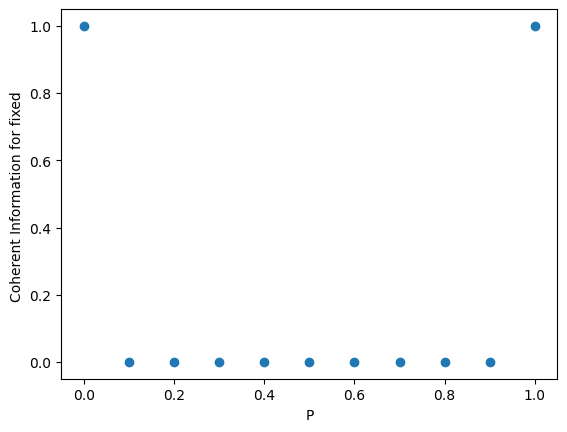

In [91]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##different phi
a=[0.9999999999996633,7.040655289336506e-06,5.5289106626332796e-14,2.1471713296250527e-13,3.552713678800501e-15,8.162359677044151e-13,5.869971175798128e-12,0,3.783837090054476e-05,1.3455903058456897e-11,0.9999785016471385]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Coherent Information for fixed ")
ply.show()

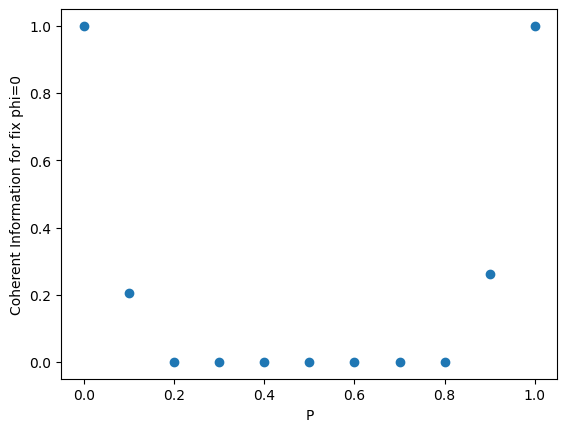

In [50]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=0
a=[0.9999999999915007,0.2040234856363201,-2.850342184501642e-11,-1.5678014442244148e-10,-1.3397283282756689e-11,8.881784197001252e-16,-1.0912204473356724e-10,-3.517186542012496e-12,-6.185536527425484e-10,0.2622737313108583,0.999999595076528]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Coherent Information for fixed phi in F")
ply.show()

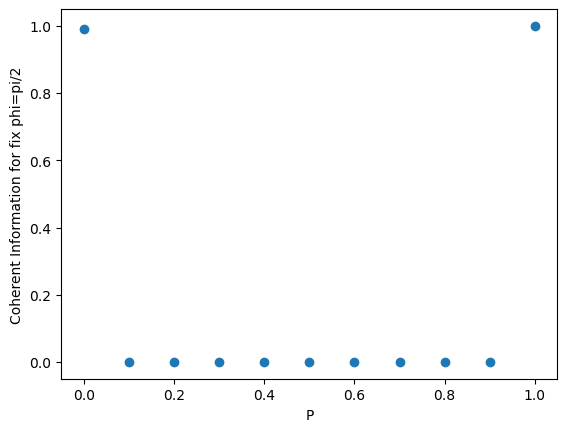

In [124]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi/2
a=[0.9896906885638987,-9.419132140919828e-13,-3.419486915845482e-14,2.220446049250313e-15,-4.215645610372576e-10,-3.4219762912179874e-08,0,-1.2212453270876722e-14,-2.949045452282917e-10,-6.217248937900877e-15,0.9999999999739182]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Coherent Information for fixed phi=pi/2")
ply.show()

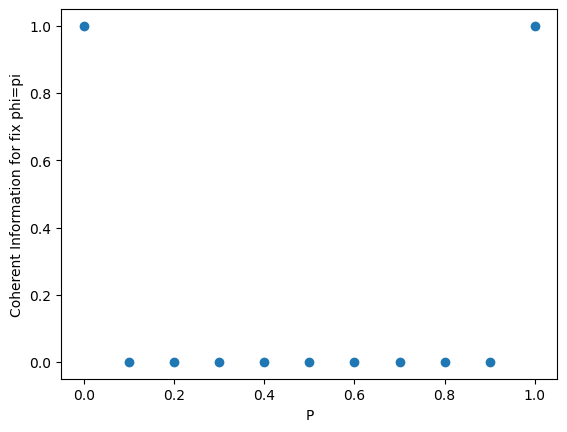

In [192]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi
a=[0.9999999917550202,0,-2.184918912462308e-13,1.4654943925052066e-13,5.795364188543317e-14,3.810285420513537e-13,1.1111112030448567e-12,-4.631219852058166e-10,2.2115642650533118e-13,2.5632829192545614e-12,0.9999999983696277]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Coherent Information for fixed phi=pi")
ply.show()

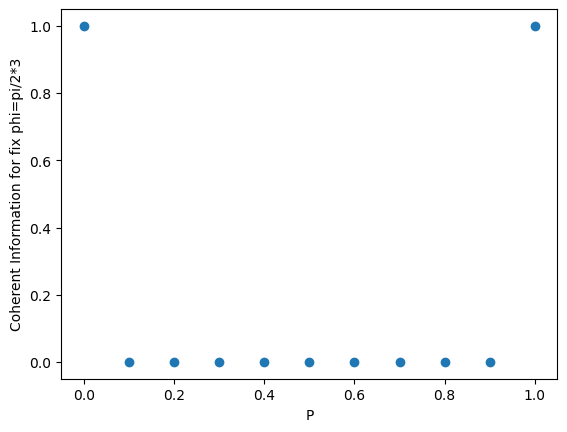

In [247]:
m=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi/2*3
a=[0.9999450402782415,9.877254569801153e-11,3.1608493600288057e-11,1.8500883793848288e-06,-1.7890477543858196e-08,3.597122599785507e-12,2.1813661987835076e-12,2.3605117860370228e-11,0,1.0892620139202336e-11,0.9999499544041548]
ply.scatter(m,a)
ply.xlabel("P")
ply.ylabel("Coherent Information for fixed phi=pi/2*3")
ply.show()

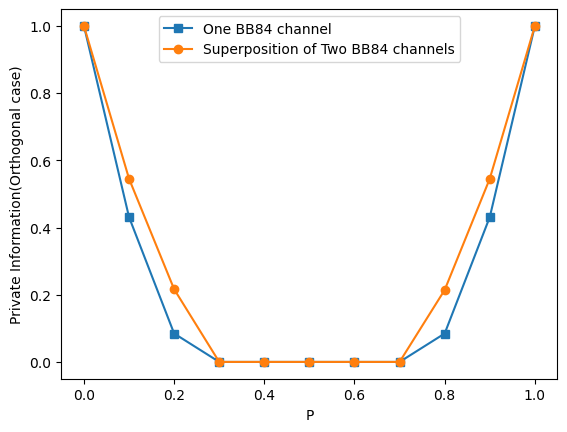

In [102]:
m1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a1=[0.9999999999999981,0.43100440641009774,0.08457237184966537,0,0,0,0,0,0.08457237174515475,0.43100440640460147,0.9999999999969549]
m2=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a2=[0.9999999999996929,0.5452074781344851,0.21647286011113365,0,0,0,0,0,0.2141774263007723,0.5452074792756527,0.9999999999998554]
fig=ply.figure()
ax1 = fig.add_subplot(111)
ax1.plot(m1,a1,marker='s',label='One BB84 channel')
ax1.plot(m2,a2,marker='o',label='Superposition of Two BB84 channels')
ply.legend(loc="best")
ply.xlabel("P")
ply.ylabel("Private Information(Orthogonal case)")
ply.show()

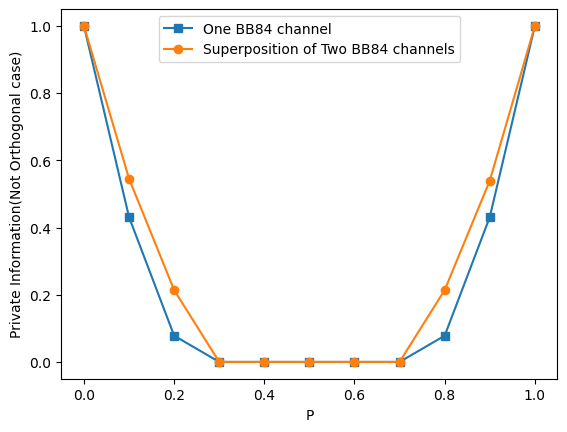

In [101]:
m1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a1=[0.9999999999980588,0.4310044064076264,0.07807190510919781,0,0,0,0,0,0.07807190511263595,0.4310044063984302,0.9999999999923324]
m2=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a2=[0.9999999999703237,0.545411925320527,0.21392937675791335,0,0,0,0,0,0.21393553235245433,0.5393774475749149,0.9999999999618845]
fig=ply.figure()
ax1 = fig.add_subplot(111)
ax1.plot(m1,a1,marker='s',label='One BB84 channel')
ax1.plot(m2,a2,marker='o',label='Superposition of Two BB84 channels')
ply.legend(loc="best")
ply.xlabel("P")
ply.ylabel("Private Information(Not Orthogonal case)")
ply.show()

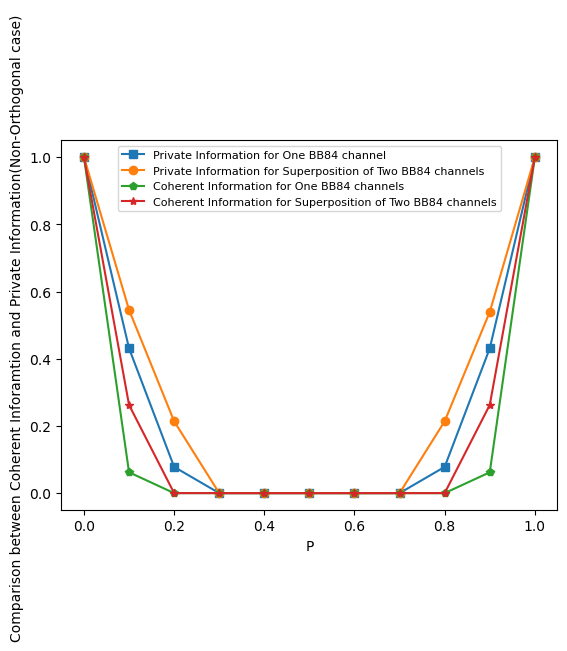

In [100]:
m1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a1=[0.9999999999980588,0.4310044064076264,0.07807190510919781,0,0,0,0,0,0.07807190511263595,0.4310044063984302,0.9999999999923324]
m2=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a2=[0.9999999999703237,0.545411925320527,0.21392937675791335,0,0,0,0,0,0.21393553235245433,0.5393774475749149,0.9999999999618845]
m3=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a3=[0.9999999999940516,0.06200881280187809,2.7909563549144423e-11,2.220446049250313e-16,3.613402699276236e-07,1.2716734332229862e-09,2.220446049250313e-16,1.1102230246251565e-15,-5.551115123125783e-16,0.06200881282142001,0.9999999999969549]
m4=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a4=[0.999999999999952,0.2625029926621154,1.2382317393644371e-11,2.826960977908577e-05,0,0,-5.44212674924438e-10,-4.178990486991552e-11,-1.021467355144523e-10,0.2625029926979081,0.9998739845388571]
fig=ply.figure()
ax1 = fig.add_subplot(111)
ax1.plot(m1,a1,marker='s',label='Private Information for One BB84 channel')
ax1.plot(m2,a2,marker='o',label='Private Information for Superposition of Two BB84 channels')
ax1.plot(m3,a3,marker='p',label='Coherent Information for One BB84 channels')
ax1.plot(m4,a4,marker='*',label='Coherent Information for Superposition of Two BB84 channels')
ply.legend(loc="best",prop={'size': 8})
ply.xlabel("P")
ply.ylabel("Comparison between Coherent Inforamtion and Private Information(Non-Orthogonal case) ")
ply.show()

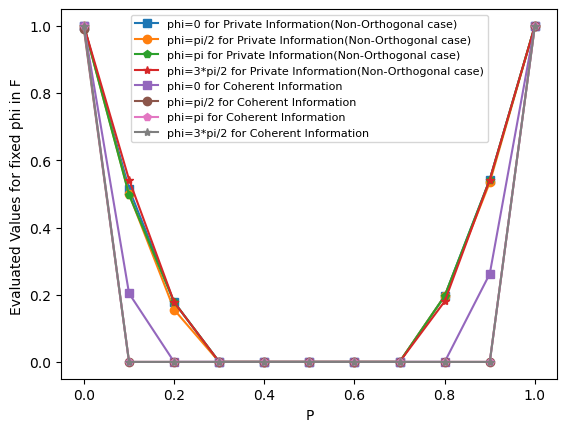

In [98]:
m1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=0 for Private Information(Non-Orthogonal case)
a1=[0.9999999996989539,0.5148630448077807,0.17789324534995954,0,0,0,0,0,0.1962925285770214,0.5425821999882858,0.9999999999938409]
m2=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi/2 for Private Information(Non-Orthogonal case)
a2=[0.9999999999795521,0.4996150117648672,0.15544260898174622,0,0,0,0,0,0.19629252865934532,0.5340816734323584,0.9999999999999518]
m3=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi for Private Information(Non-Orthogonal case)
a3=[0.9999999998928019,0.49746424537113354,0.17789324526067007,0,0,0,0,0,0.1961134986330053,0.5425821231185262,0.9999999999861893]
m4=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi*3/2 for Private Information(Non-Orthogonal case)
a4=[0.9999999996891648,0.5425824507642487,0.17789324537822404,0,0,0,0,0,0.1802369656783982,0.5425821225288245,0.9999999998394212]
m5=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=0 for Coherent Information
a5=[0.9999999999915007,0.2040234856363201,-2.850342184501642e-11,-1.5678014442244148e-10,-1.3397283282756689e-11,8.881784197001252e-16,-1.0912204473356724e-10,-3.517186542012496e-12,-6.185536527425484e-10,0.2622737313108583,0.999999595076528]
m6=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi/2 for Coherent Information
a6=[0.9896906885638987,-9.419132140919828e-13,-3.419486915845482e-14,2.220446049250313e-15,-4.215645610372576e-10,-3.4219762912179874e-08,0,-1.2212453270876722e-14,-2.949045452282917e-10,-6.217248937900877e-15,0.9999999999739182]
m7=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi for Coherent Information
a7=[0.9999999917550202,0,-2.184918912462308e-13,1.4654943925052066e-13,5.795364188543317e-14,3.810285420513537e-13,1.1111112030448567e-12,-4.631219852058166e-10,2.2115642650533118e-13,2.5632829192545614e-12,0.9999999983696277]
m8=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##phi=pi/2*3 for Coherent Information
a8=[0.9999450402782415,9.877254569801153e-11,3.1608493600288057e-11,1.8500883793848288e-06,-1.7890477543858196e-08,3.597122599785507e-12,2.1813661987835076e-12,2.3605117860370228e-11,0,1.0892620139202336e-11,0.9999499544041548]
fig=ply.figure()
ax1 = fig.add_subplot(111)
ax1.plot(m1,a1,marker='s',label='phi=0 for Private Information(Non-Orthogonal case)')
ax1.plot(m2,a2,marker='o',label='phi=pi/2 for Private Information(Non-Orthogonal case)')
ax1.plot(m3,a3,marker='p',label='phi=pi for Private Information(Non-Orthogonal case)')
ax1.plot(m4,a4,marker='*',label='phi=3*pi/2 for Private Information(Non-Orthogonal case)')
ax1.plot(m5,a5,marker='s',label='phi=0 for Coherent Information')
ax1.plot(m6,a6,marker='o',label='phi=pi/2 for Coherent Information')
ax1.plot(m7,a7,marker='p',label='phi=pi for Coherent Information')
ax1.plot(m8,a8,marker='*',label='phi=3*pi/2 for Coherent Information')
ply.legend(loc="best",prop={'size': 8})
ply.xlabel("P")
ply.ylabel("Evaluated Values for fixed phi in F ")
ply.show()

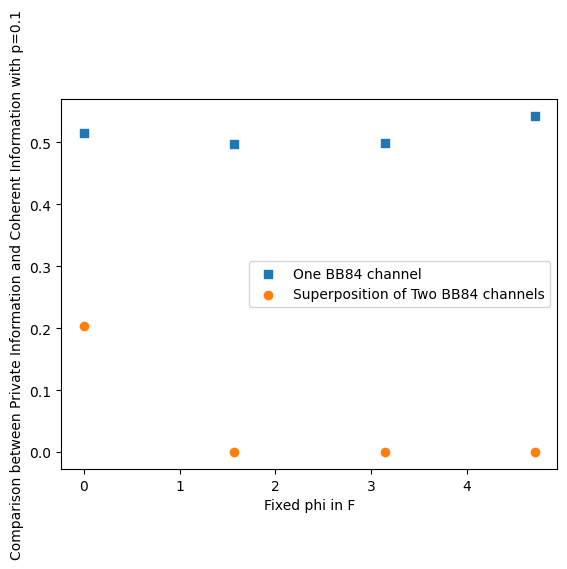

In [17]:
m=[0,np.pi,np.pi/2,3*np.pi/2] ##p=0.1
a1=[0.5148630448077807,0.4996150117648672,0.49746424537113354,0.5425824507642487]
a2=[0.2040234856363201,-9.419132140919828e-13,-2.184918912462308e-13,9.877254569801153e-11]
fig=ply.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(m,a1,marker='s',label='One BB84 channel')
ax1.scatter(m,a2,marker='o',label='Superposition of Two BB84 channels')
ply.legend(loc="right")
ply.xlabel("Fixed phi in F")
ply.ylabel("Comparison between Private Information and Coherent Information with p=0.1")
ply.show()

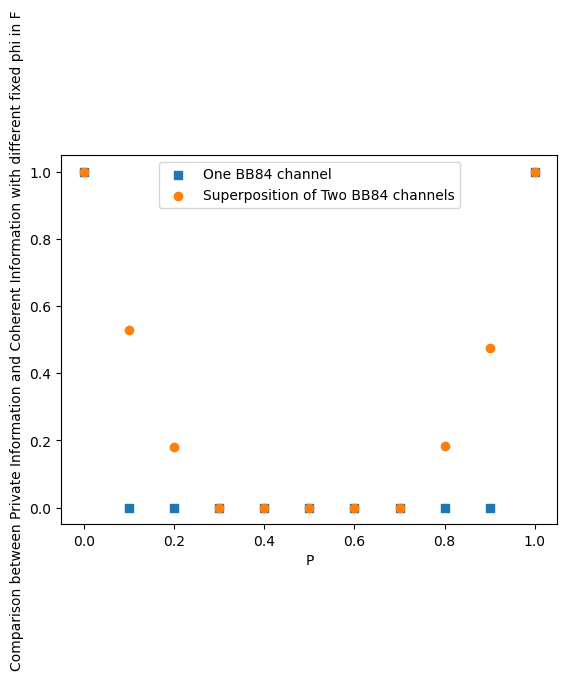

In [3]:
m1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##different phi
a1=[0.9999999999996633,7.040655289336506e-06,5.5289106626332796e-14,2.1471713296250527e-13,3.552713678800501e-15,8.162359677044151e-13,5.869971175798128e-12,0,3.783837090054476e-05,1.3455903058456897e-11,0.9999785016471385]
m2=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]##different phi
a2=[0.9999999999769131,0.528312825908462,0.17994765915451838,0,0,0,0,0,0.18235179332536422,0.4759917523445498,0.9999999999884135]
fig=ply.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(m1,a1,marker='s',label='One BB84 channel')
ax1.scatter(m2,a2,marker='o',label='Superposition of Two BB84 channels')
ply.legend(loc="best")
ply.xlabel("P")
ply.ylabel("Comparison between Private Information and Coherent Information with different fixed phi in F")
ply.show()